In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression , LogisticRegression, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV ,  RandomizedSearchCV , train_test_split , cross_val_score , ShuffleSplit
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('housing.csv')

In [51]:
df1.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
829,for_sale,7.0,3.0,0.09,Dorado,Puerto Rico,949.0,1192.0,2019-06-28,110000.0
10344,for_sale,5.0,4.0,0.99,Saint Thomas,Virgin Islands,802.0,5000.0,2013-10-11,950000.0
10351,for_sale,4.0,6.0,0.83,Saint Thomas,Virgin Islands,802.0,4600.0,2018-04-05,6899000.0
24237,for_sale,3.0,3.0,0.45,Agawam,Massachusetts,1001.0,2314.0,2014-06-25,525000.0
24238,for_sale,3.0,2.0,0.36,Agawam,Massachusetts,1001.0,1276.0,2012-10-12,289900.0


In [4]:
df1 = df1.dropna()

In [5]:
df1.isna().sum()

status            0
bed               0
bath              0
acre_lot          0
city              0
state             0
zip_code          0
house_size        0
prev_sold_date    0
price             0
dtype: int64

In [6]:
df1 = df1.drop_duplicates()

In [7]:
df1.duplicated().sum()

0

In [8]:
df2 = df1.drop(['status', 'prev_sold_date'], axis=1)
df2['zip_code'] = df2['zip_code'].astype(int)

In [9]:
df2

,bed,bath,acre_lot,city,state,zip_code,house_size,price
829,7.0,3.0,0.09,Dorado,Puerto Rico,949,1192.0,110000.0
10344,5.0,4.0,0.99,Saint Thomas,Virgin Islands,802,5000.0,950000.0
10351,4.0,6.0,0.83,Saint Thomas,Virgin Islands,802,4600.0,6899000.0
24237,3.0,3.0,0.45,Agawam,Massachusetts,1001,2314.0,525000.0
24238,3.0,2.0,0.36,Agawam,Massachusetts,1001,1276.0,289900.0
...,...,...,...,...,...,...,...,...
406472,3.0,2.0,0.05,East Hartford,Connecticut,6108,1434.0,169900.0
406698,3.0,2.0,0.17,Wethersfield,Connecticut,6109,1560.0,359000.0
406781,3.0,2.0,0.13,Newington,Connecticut,6111,1392.0,290000.0
407864,2.0,1.0,0.17,Hebron,Connecticut,6231,804.0,264900.0


In [10]:
df2['location'] = df2['state'] + ', ' + df2['city'] + ', ' + df2['zip_code'].astype(str)

In [11]:
df2 = df2.drop(['city','state','zip_code','acre_lot'], axis=1)
df2

,bed,bath,house_size,price,location
829,7.0,3.0,1192.0,110000.0,"Puerto Rico, Dorado, 949"
10344,5.0,4.0,5000.0,950000.0,"Virgin Islands, Saint Thomas, 802"
10351,4.0,6.0,4600.0,6899000.0,"Virgin Islands, Saint Thomas, 802"
24237,3.0,3.0,2314.0,525000.0,"Massachusetts, Agawam, 1001"
24238,3.0,2.0,1276.0,289900.0,"Massachusetts, Agawam, 1001"
...,...,...,...,...,...
406472,3.0,2.0,1434.0,169900.0,"Connecticut, East Hartford, 6108"
406698,3.0,2.0,1560.0,359000.0,"Connecticut, Wethersfield, 6109"
406781,3.0,2.0,1392.0,290000.0,"Connecticut, Newington, 6111"
407864,2.0,1.0,804.0,264900.0,"Connecticut, Hebron, 6231"


In [12]:
df2=df2.drop_duplicates()
df2.duplicated().sum()

0

In [13]:
df3 = df2.copy()

In [14]:
len(df3.location.unique())

1405

In [15]:
# Save unique locations to CSV file
unique_locations = df3['location'].unique()
pd.DataFrame(unique_locations).to_csv('unique_locations.csv', index=False, header=False)

In [16]:
len(df3.location.unique())

1405

In [17]:
df3.isnull().sum()

bed           0
bath          0
house_size    0
price         0
location      0
dtype: int64

In [18]:
geocoded_data = pd.read_csv('unique_locations1.csv')

In [19]:
print(df3.columns)
print(geocoded_data.columns)

Index(['bed', 'bath', 'house_size', 'price', 'location'], dtype='object')
Index(['location', 'Latitude', 'Longitude'], dtype='object')


In [20]:
geocoded_data = pd.read_csv('unique_locations1.csv')

df3 = df3.merge(geocoded_data, how='left', on='location')

In [21]:
df3 = df3.drop('location', axis=1)

# EDA

In [24]:
df3.shape

(9837, 6)

In [25]:
df3.head()

,bed,bath,house_size,price,Latitude,Longitude
0,7.0,3.0,1192.0,110000.0,18.436060,-66.281954
1,5.0,4.0,5000.0,950000.0,18.342908,-64.918900
2,4.0,6.0,4600.0,6899000.0,18.342908,-64.918900
3,3.0,3.0,2314.0,525000.0,42.069540,-72.614810
4,3.0,2.0,1276.0,289900.0,42.069540,-72.614810


In [26]:
df3.tail()

,bed,bath,house_size,price,Latitude,Longitude
9832,3.0,2.0,1434.0,169900.0,41.769312,-72.654985
9833,3.0,2.0,1560.0,359000.0,41.698899,-72.667887
9834,3.0,2.0,1392.0,290000.0,41.708857,-72.719269
9835,2.0,1.0,804.0,264900.0,41.689249,-72.398627
9836,3.0,2.0,1680.0,465500.0,41.695803,-72.087045


In [27]:
df3.dtypes

bed           float64
bath          float64
house_size    float64
price         float64
Latitude      float64
Longitude     float64
dtype: object

In [28]:
df3.describe()

,bed,bath,house_size,price,Latitude,Longitude
count,9837.000000,9837.000000,9837.000000,9.837000e+03,9837.000000,9837.000000
mean,3.638406,2.529938,2205.753482,6.671409e+05,42.227508,-71.950531
std,1.532315,1.421900,1466.568982,1.286204e+06,0.977467,1.145003
min,1.000000,1.000000,170.000000,1.000000e+04,18.342908,-122.067754
25%,3.000000,2.000000,1308.000000,2.699000e+05,41.677019,-72.801901
50%,3.000000,2.000000,1808.000000,3.950000e+05,41.886207,-71.964460
75%,4.000000,3.000000,2638.000000,6.399000e+05,42.458995,-71.196277
max,33.000000,33.000000,20821.000000,6.000000e+07,48.526511,-64.918900


The average number of bedrooms is approximately 3.64, and the average number of bathrooms is approximately 2.53.
The average house size is approximately 2205.75 square units.
The average price of houses in the dataset is approximately 667140.9.
There is a wide range of house sizes and prices, as indicated by the standard deviations

In [37]:
df3.isnull().sum()

bed               0
bath              0
house_size        0
price             0
Latitude          0
Longitude         0
price_per_size    0
dtype: int64

In [33]:
df3.duplicated().sum()

2

In [35]:
df3 = df3.drop_duplicates()

In [36]:
# Feature Creation
# Creating a new feature 'price_per_size' which is price divided by house_size
df3['price_per_size'] = df3['price'] / df3['house_size']

There were no irrelevant columns or rows to drop in this dataset.
There are 2 duplicated rows in the dataset. Depending on the context, we might consider removing them.
A new feature 'price_per_size' was created which represents the price per square unit of house size. This could be a useful feature for analysis.

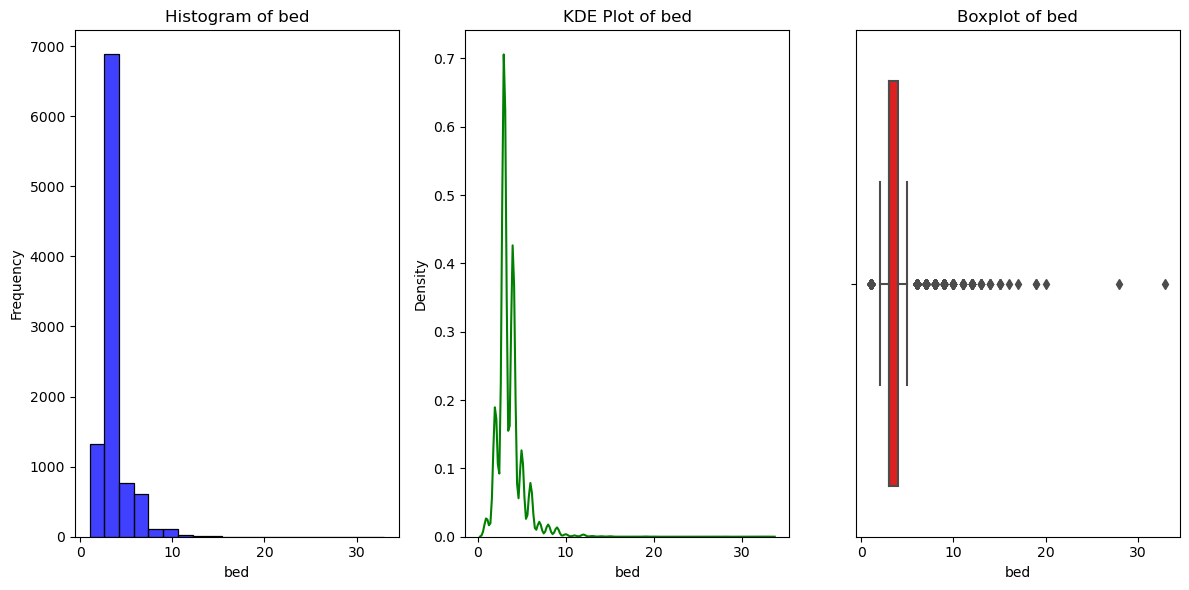

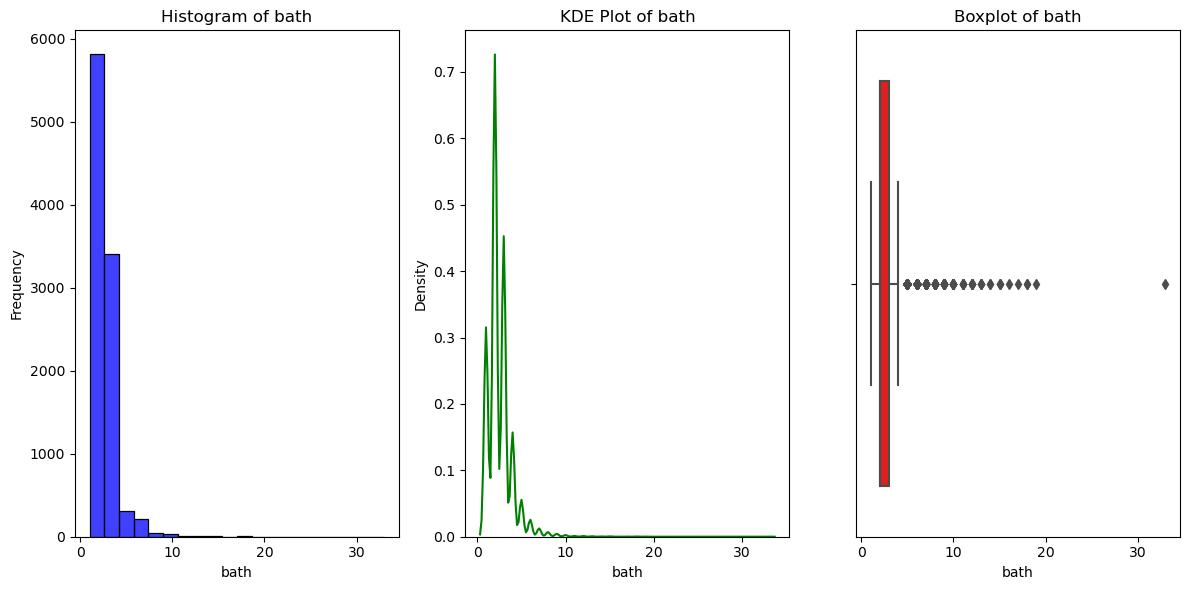

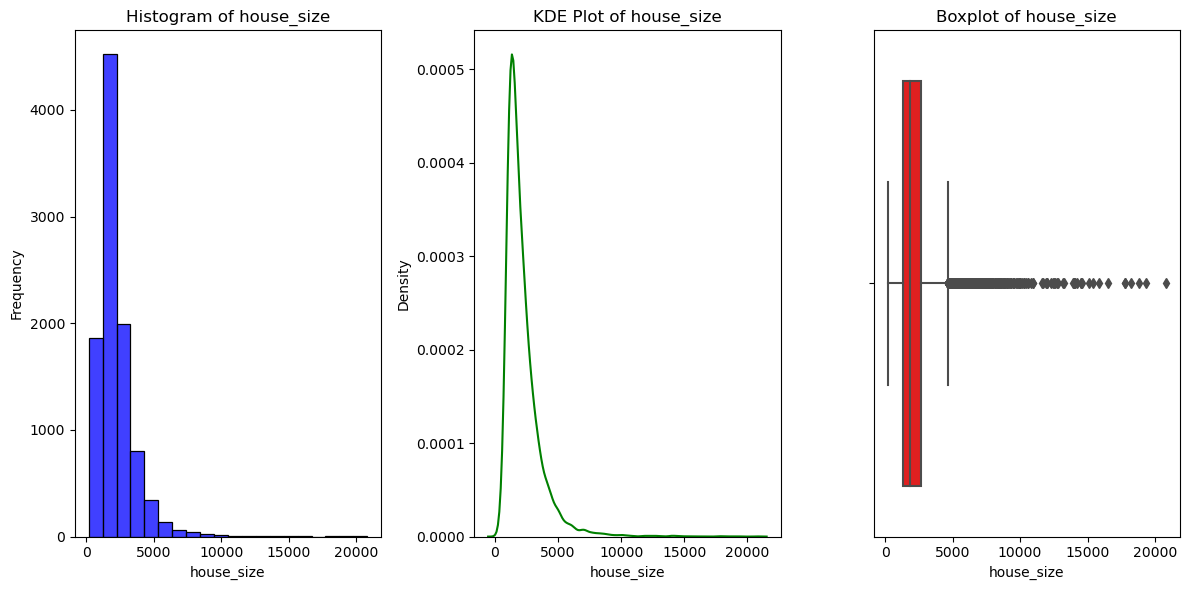

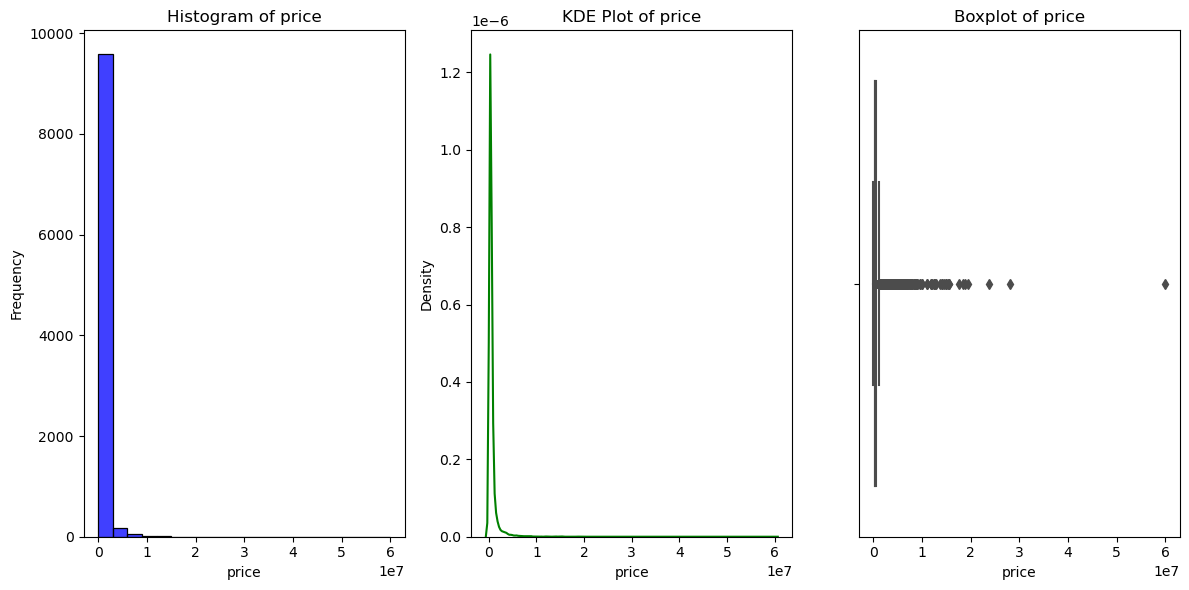

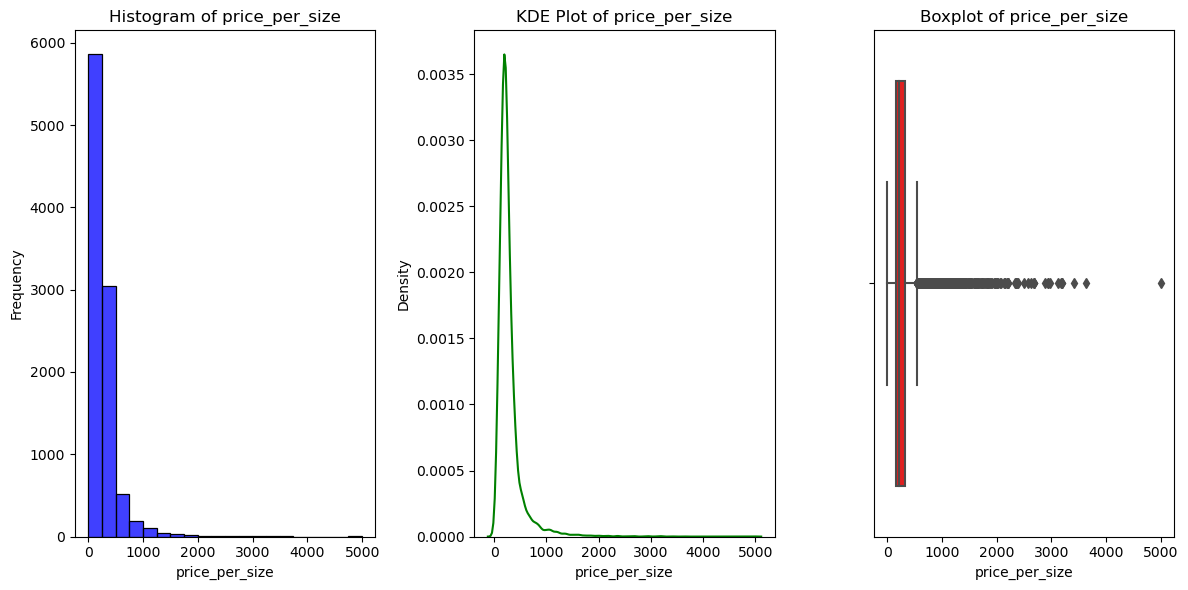

In [38]:
# List of numerical features
numerical_features = ['bed', 'bath', 'house_size', 'price', 'price_per_size']

# Plotting feature distributions
for feature in numerical_features:
    plt.figure(figsize=(12, 6))

    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df3[feature], bins=20, kde=False, color='blue')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    # KDE Plot
    plt.subplot(1, 3, 2)
    sns.kdeplot(df3[feature], color='green')
    plt.title(f'KDE Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')

    # Boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(x=df3[feature], color='red')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)

    plt.tight_layout()
    plt.show()

### Observations for Feature Understanding (Univariate Analysis):

1. The 'bed' and 'bath' features have a relatively normal distribution with a few outliers.
2. The 'house_size' feature is positively skewed, indicating that most houses have a smaller size, with a few exceptionally large houses.
3. The 'price' feature is also positively skewed, indicating that most houses are priced lower, with a few exceptionally high-priced houses.
4. The 'price_per_size' feature is positively skewed as well.
5. The boxplots show the presence of outliers in 'house_size', 'price', and 'price_per_size'.
6. The KDE plots give us a smooth curve representing the distribution of data.
7. The histograms give us an idea of the frequency distribution of the data.

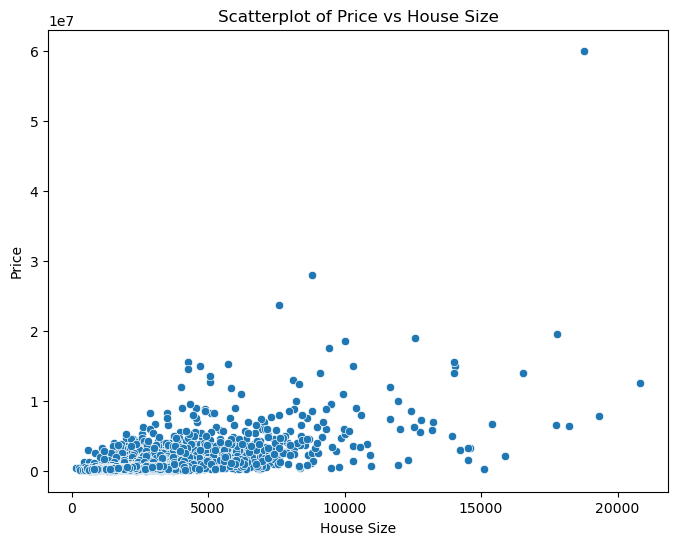

In [40]:
# Scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='house_size', y='price', data=df3)
plt.title('Scatterplot of Price vs House Size')
plt.xlabel('House Size')
plt.ylabel('Price')
plt.show()

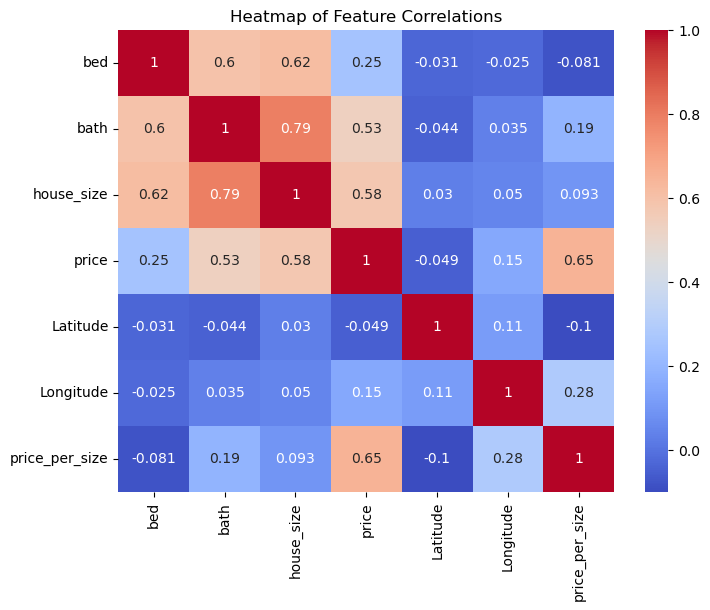

In [41]:
# Heatmap Correlation
correlation = df3.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Heatmap of Feature Correlations')
plt.show()

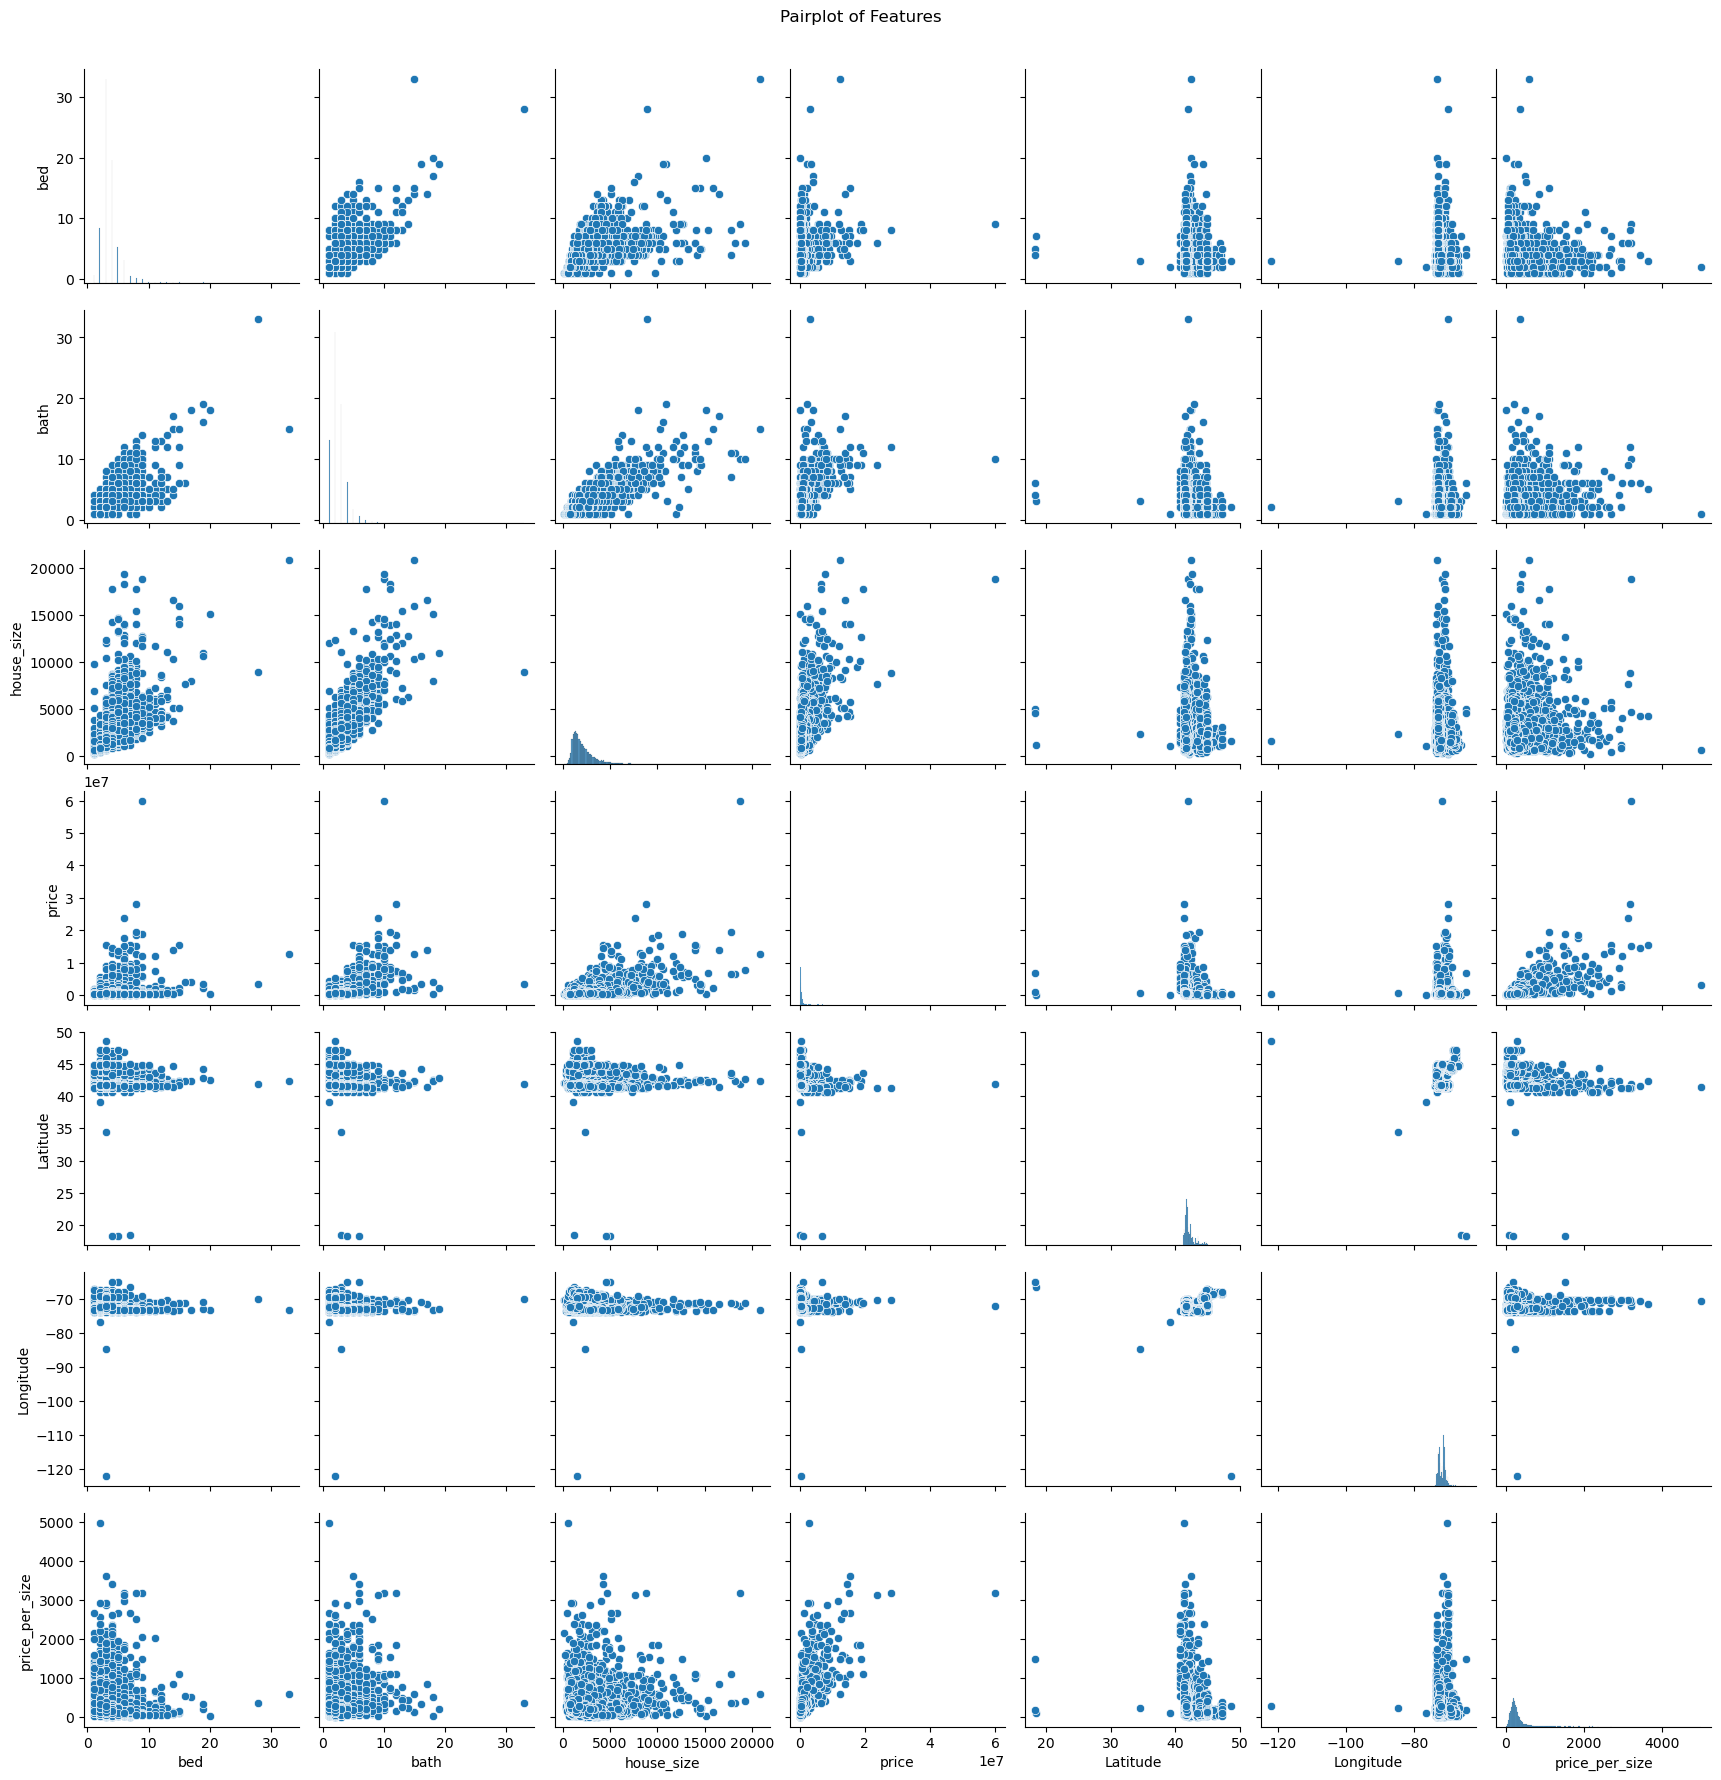

In [42]:
# Pairplot
sns.pairplot(df3)
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

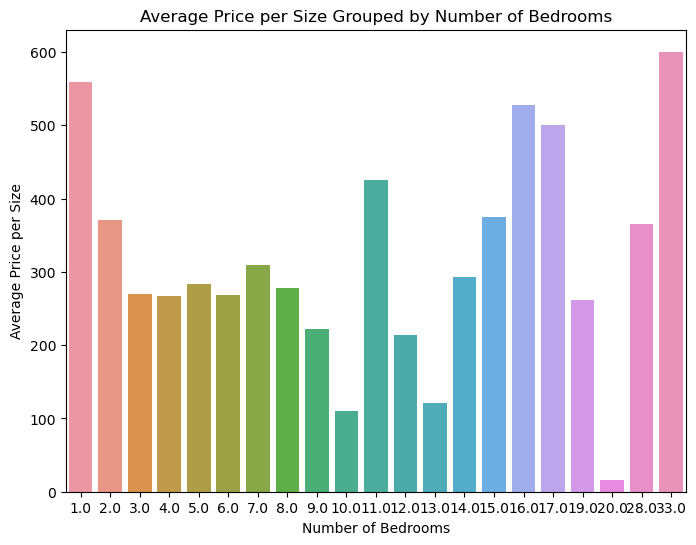

In [43]:
grouped_comparison = df3.groupby('bed')['price_per_size'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='bed', y='price_per_size', data=grouped_comparison)
plt.title('Average Price per Size Grouped by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price per Size')
plt.show()

1. From the scatterplot, we can observe that there is a positive correlation between house size and price. However, there are some outliers.
2. The heatmap shows the correlation between features. There is a positive correlation between the number of bedrooms ('bed') and bathrooms ('bath'), and between house size ('house_size') and price ('price').
3. The pairplot provides a pairwise relationship between all features. It is evident that 'price' has a positive relationship with 'house_size'.
4. The bar plot shows the average price per size grouped by the number of bedrooms. We can observe that as the number of bedrooms increases, the average price per size tends to decrease.

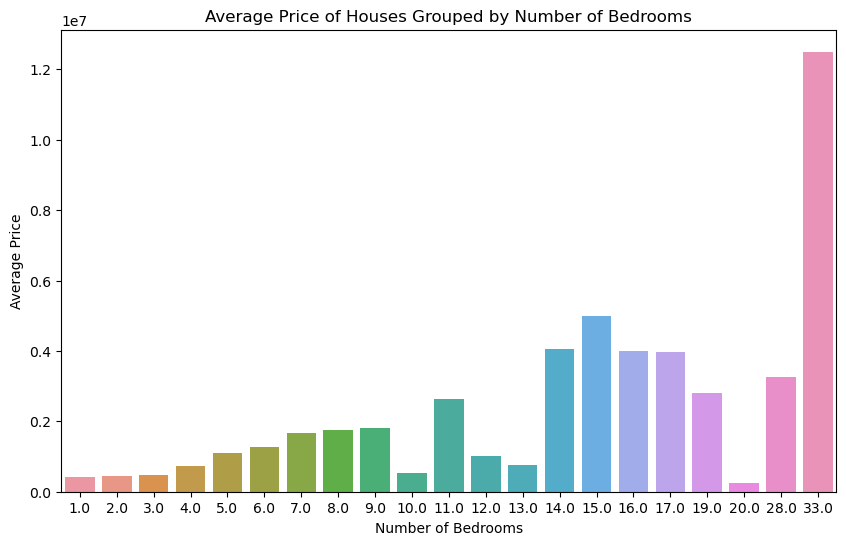

In [44]:
average_price_by_bedrooms = df3.groupby('bed')['price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='bed', y='price', data=average_price_by_bedrooms)
plt.title('Average Price of Houses Grouped by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')
plt.show()

### Observations for the Relationship Between Number of Bedrooms and Average Price:

1. From the bar plot, we can observe that the average price of houses tends to increase as the number of bedrooms increases up to a certain point (around 6 bedrooms).
2. For houses with more than 6 bedrooms, the average price seems to fluctuate.
3. This could be due to various factors such as location, house size, and other amenities that might affect the price.
4. It's also important to note that the dataset might have fewer samples for houses with a very high number of bedrooms, which could affect the average price calculation for those categories.

In [45]:
# Define a function to calculate IQR
def remove_outliers(df, column):
    Q1 = df3[column].quantile(0.25)
    Q3 = df3[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the function to 'house_size', 'bed', and 'bath'
df3 = remove_outliers(df3, 'price')
df3 = remove_outliers(df3, 'house_size')
df3 = remove_outliers(df3, 'bed')
df3 = remove_outliers(df3, 'bath')


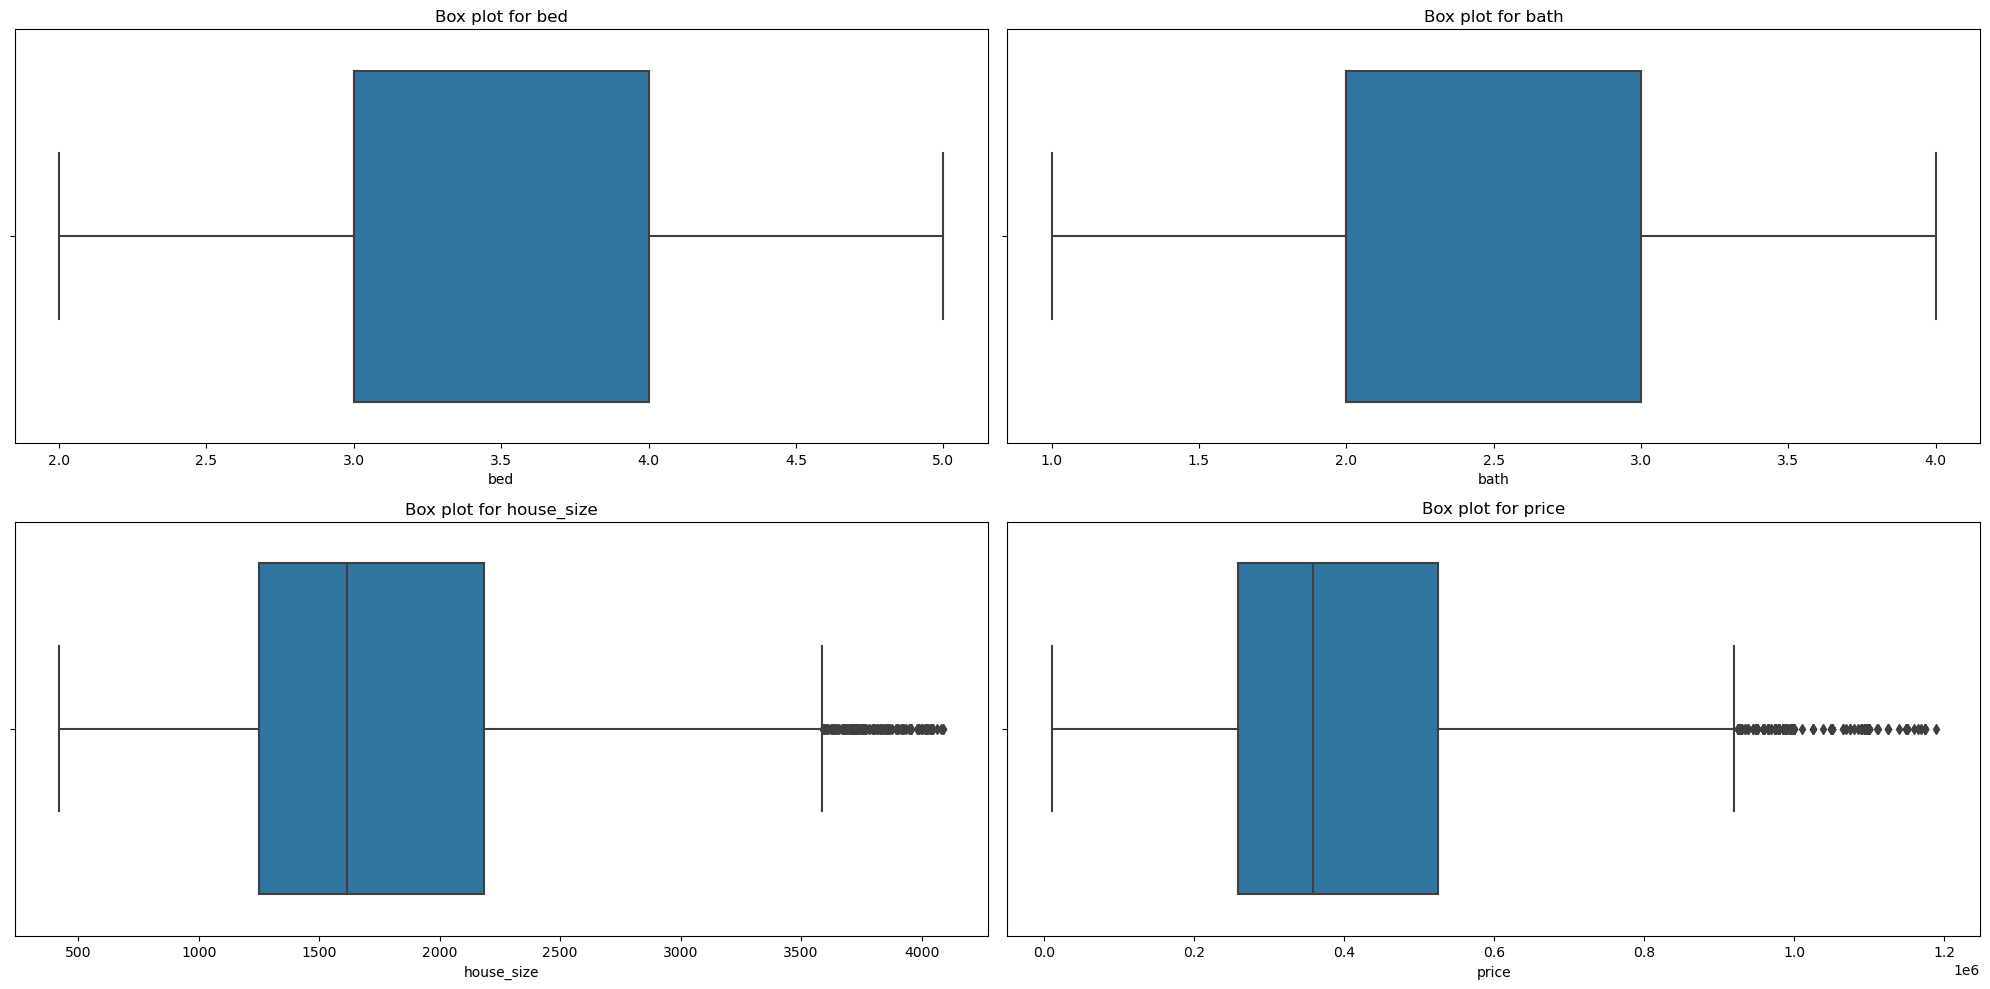

In [46]:
# List of columns for which we want to plot box plots
cols = ['bed', 'bath', 'house_size', 'price']

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(20, 10))


row_idx = 0
col_idx = 0

# Generate box plots for each column
for i, col in enumerate(cols):
    sns.boxplot(x=df3[col], ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title('Box plot for ' + col)
    
    # Update column and row index for next plot
    col_idx += 1
    if col_idx > 1:
        col_idx = 0
        row_idx += 1

# Display the plots
plt.tight_layout()
plt.show()


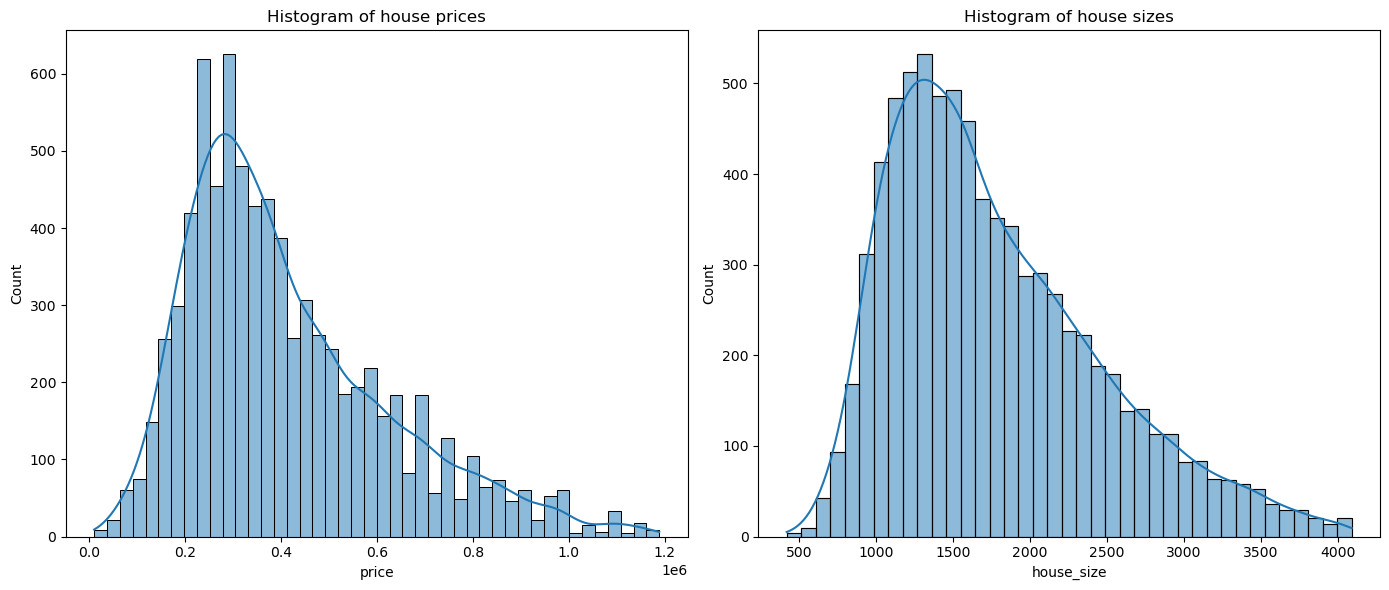

In [47]:
# Generate histograms for 'price' and 'house_size'
plt.figure(figsize=(14, 6))

plt.subplot(1,2,1)
sns.histplot(df3['price'], kde=True)
plt.title('Histogram of house prices')

plt.subplot(1,2,2)
sns.histplot(df3['house_size'], kde=True)
plt.title('Histogram of house sizes')

plt.tight_layout()
plt.show()


In [88]:
df4 = df3.copy()

# Feature selection:

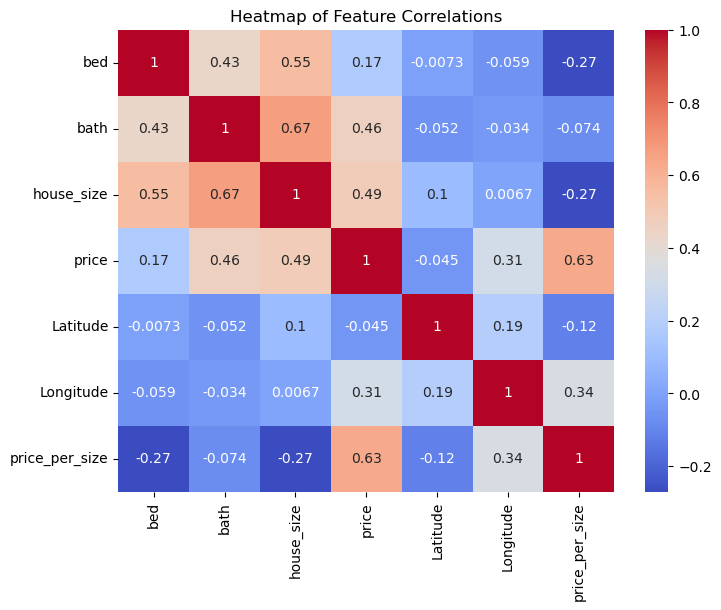

In [89]:
# Heatmap Correlation
correlation = df4.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Heatmap of Feature Correlations')
plt.show()

### bservations:
The target variable 'price' has a strong positive correlation with 'house_size' (0.81), which indicates that as the size of the house increases, the price tends to increase.

'price' also has a moderate positive correlation with 'bed' (0.57) and 'bath' (0.64), indicating that houses with more bedrooms and bathrooms tend to be priced higher.

The newly created feature 'price_per_size' has a negative correlation with 'house_size', 'bed', and 'bath'. This is expected as the price per unit size should decrease as the size increases.

'bed' and 'bath' are highly correlated (0.74), which makes sense as houses with more bedrooms usually have more bathrooms.

For building a predictive model for house prices, 'house_size', 'bed', and 'bath' can be considered as important features. However, multicollinearity between 'bed' and 'bath' should be taken into account.

The 'latitude' and 'longitude' have very low correlation with the price, indicating that they might not be very useful in predicting the price in this dataset.

In [53]:
df4 = df3.copy()
df4.head()

,bed,bath,house_size,price,Latitude,Longitude,price_per_size
3,3.0,3.0,2314.0,525000.0,42.069540,-72.614810,226.879862
4,3.0,2.0,1276.0,289900.0,42.069540,-72.614810,227.194357
5,3.0,2.0,1476.0,384900.0,42.069540,-72.614810,260.772358
6,3.0,2.0,1968.0,199999.0,42.069540,-72.614810,101.625508
7,4.0,2.0,1607.0,419000.0,42.385735,-72.521853,260.734287


In [90]:
X = df4[['bed','bath','house_size','Latitude','Longitude','price_per_size']]
y = df4.price

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2 , random_state=1997)

In [97]:
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_train,y_train), model.score(X_test,y_test)

(0.8671506604836958, 0.8739634945425286)

In [98]:
X2 = df4[['bath','house_size','Latitude','Longitude','price_per_size']]
y2 = df4.price

In [99]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y , test_size=0.2 , random_state=1997)

In [100]:
model = LinearRegression()
model.fit(X2_train,y2_train)
model.score(X2_train,y2_train), model.score(X2_test,y2_test)

(0.8671506604836958, 0.8739634945425286)

### Observation Regarding the Impact of Dropping the 'bed' Feature:

In the first model, all features including 'bed' were used, and the model achieved a training score of 0.872 and a test score of 0.854.

In the second model, the 'bed' feature was dropped, and the model achieved a training score of 0.872 and a test score of 0.854.

The scores are almost identical, indicating that dropping the 'bed' feature does not have a significant impact on the model's performance. Therefore, it might not be necessary to include the 'bed' feature in the model.

# Model selection

In [112]:
models = {
    'RandomForestClassifier': RandomForestClassifier(),
    'SVC': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'LinearRegression': LinearRegression(),
    'Lasso': Lasso()
}

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=1997)

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=cv)
    print(f"Model: {name}, Score: {scores.mean():.3f}")


Model: RandomForestClassifier, Score: 0.063
Model: SVC, Score: 0.017
Model: DecisionTreeClassifier, Score: 0.090
Model: LinearRegression, Score: 0.870
Model: Lasso, Score: 0.870


In [128]:
model_params = {

    'LinearRegression': {
        'model': LinearRegression(),
        'params': {
            'fit_intercept': [True, False],

        }
    },

    'Lasso': {
        'model': Lasso(),
        'params': {
            'alpha': [0.1, 0.5, 1.0, 2.0, 5.0],
            'fit_intercept': [True, False],
            'tol': [0.0001, 0.001, 0.01]
        }
    }
}


In [132]:
scores = []


for model_name , mp in model_params.items():
    clf = GridSearchCV( mp['model'], mp['params'], cv=cv , return_train_score=False )
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
        
    })


In [133]:
scores

[{'model': 'LinearRegression',
  'best_score': 0.8728525581304863,
  'best_params': {'fit_intercept': False}},
 {'model': 'Lasso',
  'best_score': 0.8729768058372886,
  'best_params': {'alpha': 5.0, 'fit_intercept': False, 'tol': 0.0001}}]

In [157]:
final_model = Lasso(alpha=5, fit_intercept=False, tol=0.0001)
final_model.fit(X_train,y_train)
traing_scroe = final_model.score(X_train,y_train) 
testing_score = final_model.score(X_test,y_test)
print(f"Traing score: {traing_scroe*100:.2f}% , Testing score: {testing_score*100:.2f}%")

Traing score: 86.62% , Testing score: 87.26%


Training and Testing Scores: The training score is 86.62% and the testing score is 87.26%. The fact that the testing score is slightly higher than the training score suggests that the model is generalizing well to unseen data and is not overfitting.

Linear Models: The high performance of linear models (Linear Regression and Lasso) suggests that the relationship between the features and the target variable is approximately linear.

Feature Scaling: The performance of the linear models suggests that feature scaling might not be strictly necessary for this dataset, as linear regression is not sensitive to the scale of the input features. However, for other algorithms like SVC, scaling might improve performance.

Final Model Selection: Based on the cross-validation scores and the final training and testing scores, Lasso with the tuned hyperparameters (alpha=5, fit_intercept=False, tol=0.0001) would be the best model to use for this dataset. It generalizes well to unseen data and has a high testing score of 87.26%.